# 主成分分析

In [ ]:
"""
次元の呪い
問題点
・空間の広がり -> データポイント間が希薄
・データポイントが取り得る組み合わせが爆発的に多くなる
・サンプル間の密度がかなり減少するので、指数関数的に多くのサンプルが必要となる
・学習困難

次元削減
1.データの標準化
2.共分散行列の計算
3.共分散行列の固有値と固有ベクトルの計算
4.固有値（データの分散を示す）が大きい順に固有ベクトル（主成分）を並べる


"""

## 普通に学習、評価

In [163]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

breast_cancer = pd.read_csv('csv/data.csv')

#混同行列
def plot_confusion_matrix(predict, y_test):
    if y_pred.dtype != 'object':
        pred = np.where(predict > 0.5, 1, 0)
        cm = confusion_matrix(y_test, pred)
    else:
        cm = confusion_matrix(y_test, predict)
    matrix = pd.DataFrame(cm)
    matrix.columns = [['予測_負例(0)', '予測_正例(1)']]
    matrix.index = [['実際_負例(0)', '実際_正例(1)']]
    return matrix

#説明変数、目的変数
X = breast_cancer.drop(['diagnosis', 'Unnamed: 32'], axis=1)
y = breast_cancer['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

#標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#ロジスティック回帰

#max_iterは最適化が収束するまでの最大反復数
logistic = LogisticRegressionCV(max_iter=1000, random_state=42)
logistic.fit(X_train_scaled, y_train)

# 検証、評価
print('訓練スコア: {:.3f}'.format(logistic.score(X_train_scaled, y_train)))
print('テストスコア: {:.3f}'.format(logistic.score(X_test_scaled, y_test)))

#混同行列
y_pred = logistic.predict(X_test_scaled)
matrix = plot_confusion_matrix(y_pred, y_test)
matrix

訓練スコア: 0.985
テストスコア: 0.978


,予測_負例(0),予測_正例(1)
実際_負例(0),144,1
実際_正例(1),4,79


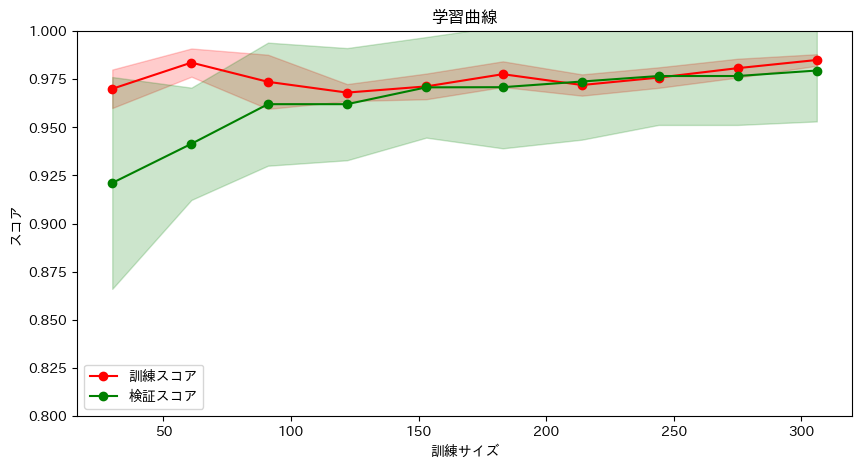

In [76]:
#学習曲線
from sklearn.model_selection import learning_curve
import japanize_matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def plot_learning_curve(model, X_data, y_data):
    
    """
    train_sizes : 使用した訓練データ数(今回は10%~100%)
    train_scores : [訓練サイズ数, cv数]のスコアが出る
    デフォルトでスコアは正解率
    """
    train_sizes, train_scores, val_scores = learning_curve(model, X=X_data, y=y_data, train_sizes = np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)
    plt.figure(figsize=[10,5])
    plt.title("学習曲線")
    plt.xlabel("訓練サイズ")
    plt.ylabel("スコア")
    
    
    # 訓練スコア と 検証スコア をプロット
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="訓練スコア")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="検証スコア")
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="r", alpha=0.2)
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, color="g", alpha=0.2)
    
    plt.ylim(0.8, 1.0)
    
    plt.legend(loc='best')
    

plot_learning_curve(logistic, X_train_scaled, y_train)

"""

訓練スコアと検証スコアともに同程度高いが、お互いあまり差がないとも言える。
したがって、汎化性能は低そう
"""

In [77]:
train_sizes, train_scores, val_scores = learning_curve(logistic, X=X_train_scaled, y=y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv=12, n_jobs=1)

In [71]:
print(X_train_scaled.shape[0])
print(train_sizes)

341
[ 30  61  91 122 153 183 214 244 275 306]


In [98]:
"""
logsticの.score_やC値に興味があったので調べてみた。
"""

for class_index, class_scores in logistic.scores_.items():
    print(f"Class {class_index}:")
    print(class_scores)
    print("Mean CV scores for each C value across folds:")
    mean_scores = np.mean(class_scores, axis=1)
    for C_val, mean_score in zip(logistic.Cs_, mean_scores):
        print(f"C: {C_val}, Mean CV Score: {mean_score}")

Class M:
[[0.62318841 0.85507246 0.97101449 0.97101449 0.97101449 0.98550725
  0.98550725 0.98550725 0.98550725 0.98550725]
 [0.63235294 0.85294118 0.94117647 0.94117647 0.94117647 0.94117647
  0.94117647 0.94117647 0.92647059 0.92647059]
 [0.61764706 0.83823529 0.91176471 0.95588235 0.97058824 0.95588235
  0.91176471 0.89705882 0.89705882 0.88235294]
 [0.63235294 0.83823529 0.95588235 0.97058824 1.         1.
  1.         1.         0.98529412 0.98529412]
 [0.61764706 0.85294118 0.92647059 0.98529412 0.98529412 0.98529412
  0.98529412 0.97058824 0.95588235 0.95588235]]
Mean CV scores for each C value across folds:
C: 0.0001, Mean CV Score: 0.9318840579710146
C: 0.000774263682681127, Mean CV Score: 0.8985294117647058
C: 0.005994842503189409, Mean CV Score: 0.8838235294117647
C: 0.046415888336127774, Mean CV Score: 0.9367647058823529
C: 0.3593813663804626, Mean CV Score: 0.9220588235294118


## 相関分析

<AxesSubplot:>

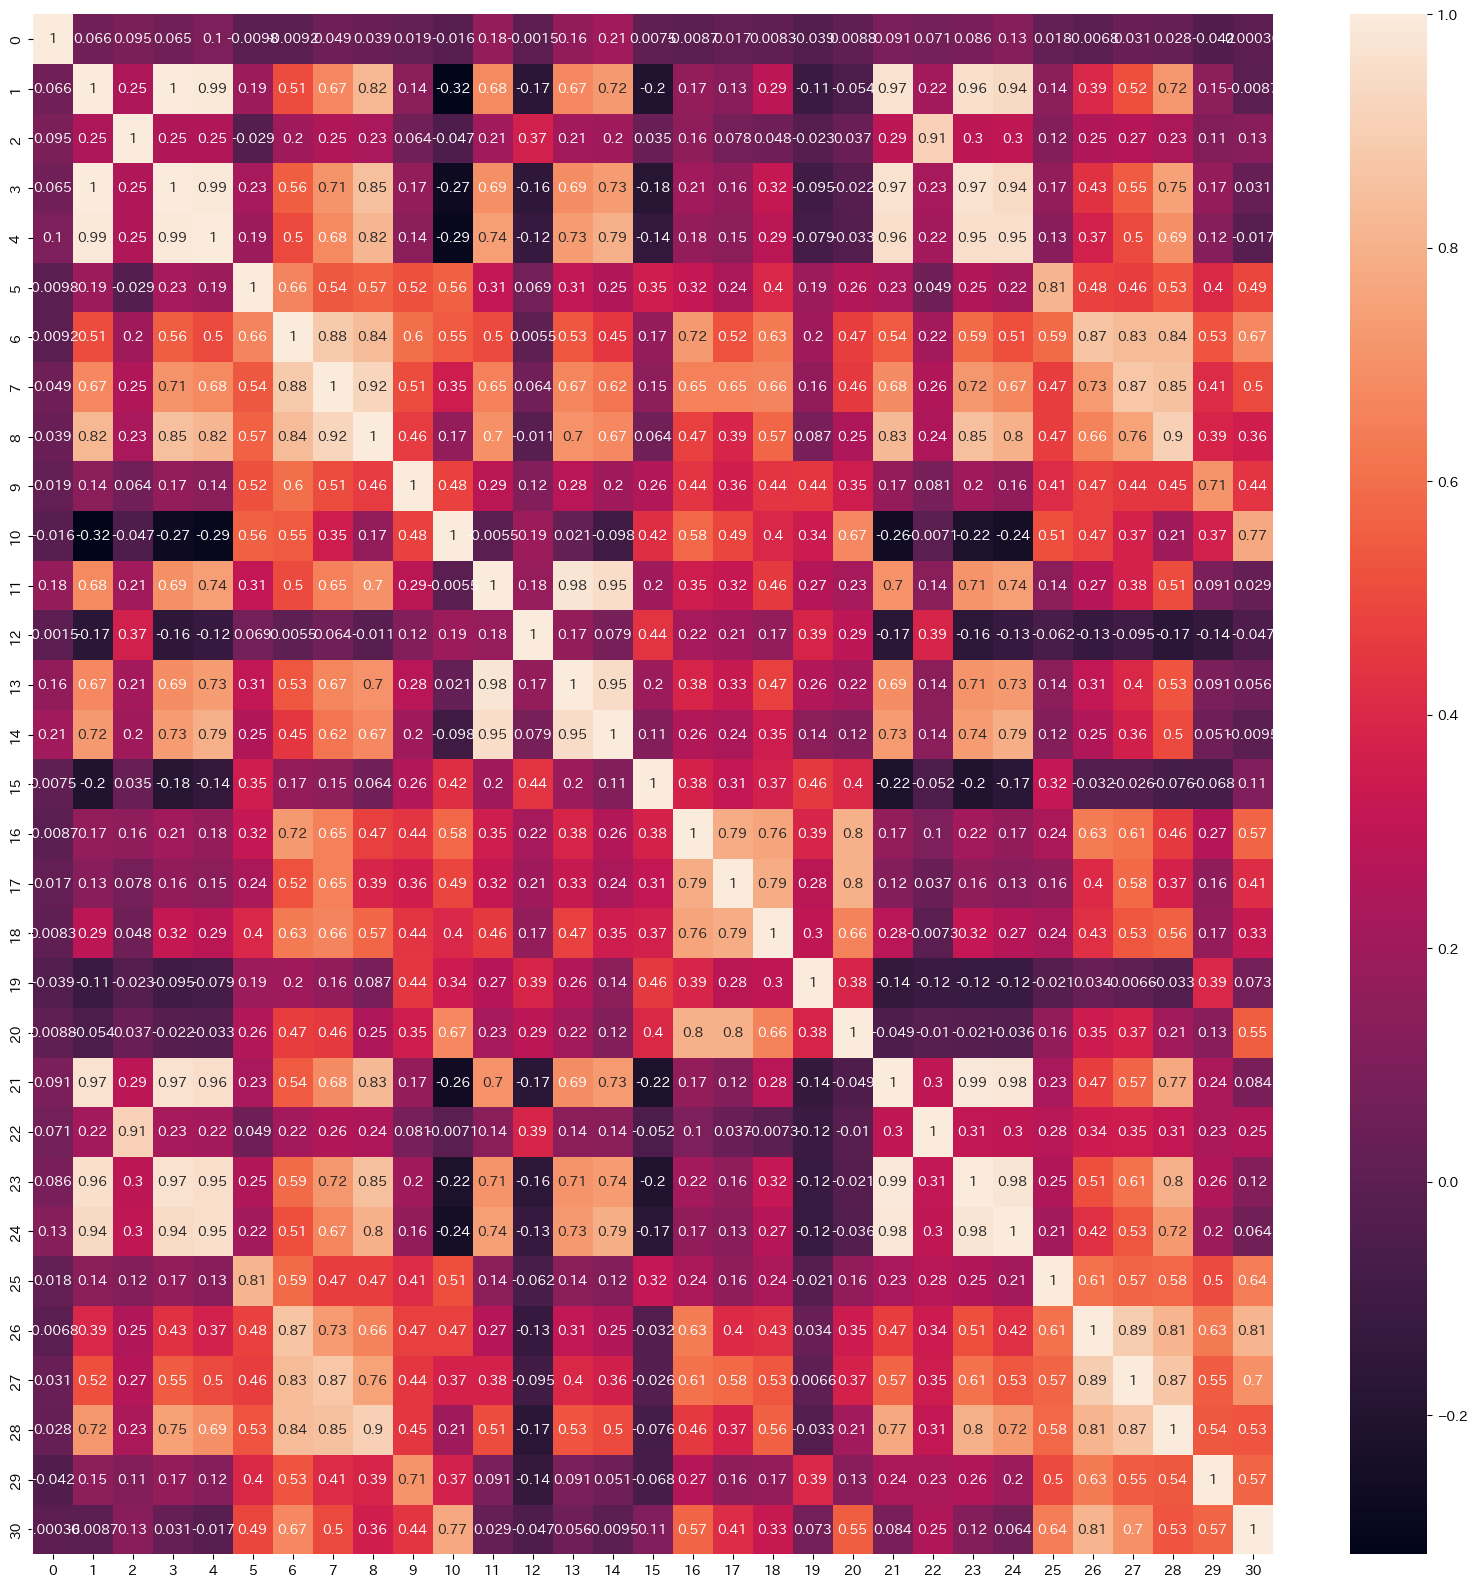

In [101]:
#ヒートマップ
import seaborn as sns

plt.figure(figsize=(20, 20))
sns.heatmap(pd.DataFrame(X_train_scaled).corr(), annot=True)

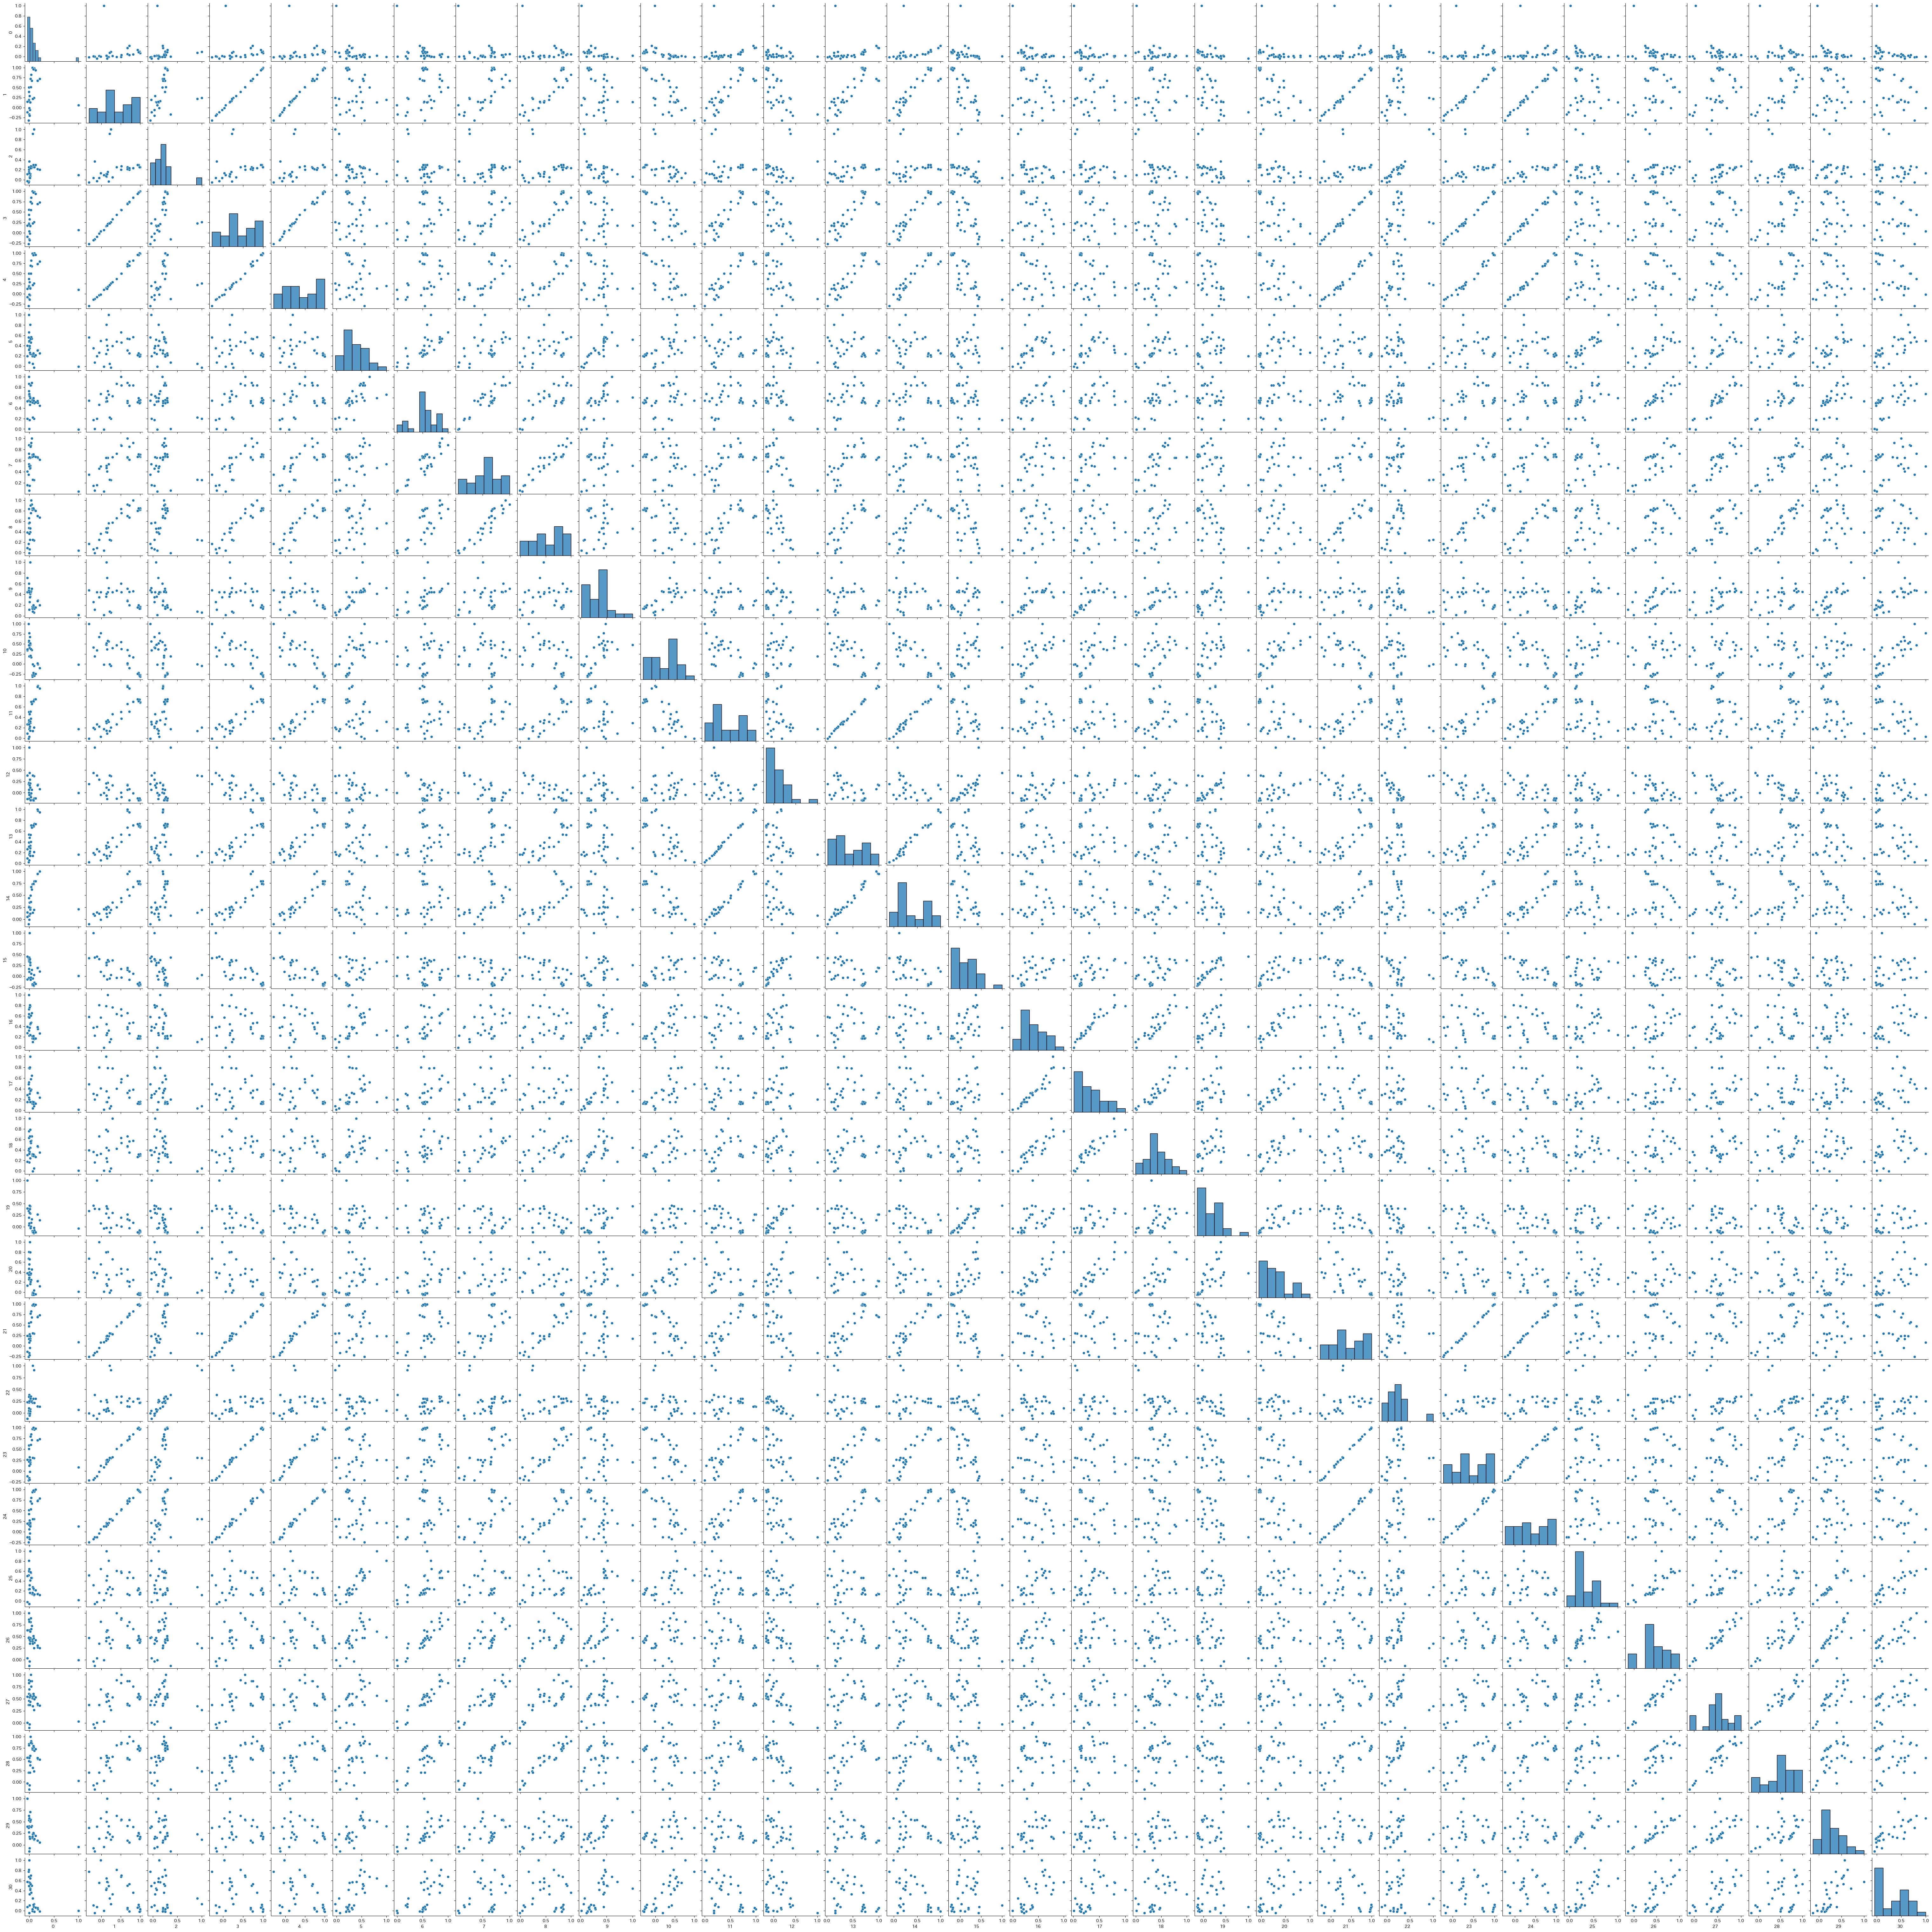

In [102]:
sns.pairplot(pd.DataFrame(X_train_scaled).corr(), height=2)

## 多重共線性とその問題点

In [ ]:
"""
ロジスティック回帰は目的変数が起こる確率を予測し、その予想確率を用いて分類する
->シグモイド曲線

多重共線性による過学習に注意する必要がある。
->交差検証を用いて改善を図る

"""

## 多重共線性の確認 (VIF: Variance Inflaction Factor)

In [ ]:
"""
主成分分析前に多重共線性の確認をする（念の為らしい）

VIFは多重共線性を検出する指標の一つ
算出結果に10を基準とすることが多い

"""

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

#Xのndarrayに対し、i列目のVIFを計算する
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['特徴量'] = X.columns

vif.sort_values(by='VIF Factor', ascending=False)

"""
ほとんどが10以上で多重共線性ありと判断できる
"""

,VIF Factor,特徴量
1,63309.441555,radius_mean
3,58123.587378,perimeter_mean
21,9677.820028,radius_worst
23,4487.783848,perimeter_worst
4,1287.411538,area_mean
24,1139.047176,area_worst
10,629.688286,fractal_dimension_mean
30,423.466387,fractal_dimension_worst
5,393.514898,smoothness_mean
25,375.678745,smoothness_worst


## 主成分分析

In [ ]:
"""
データ群を要約する際はなるべく情報を損失させずに、データを最小限に圧縮する
"""

<BarContainer object of 30 artists>

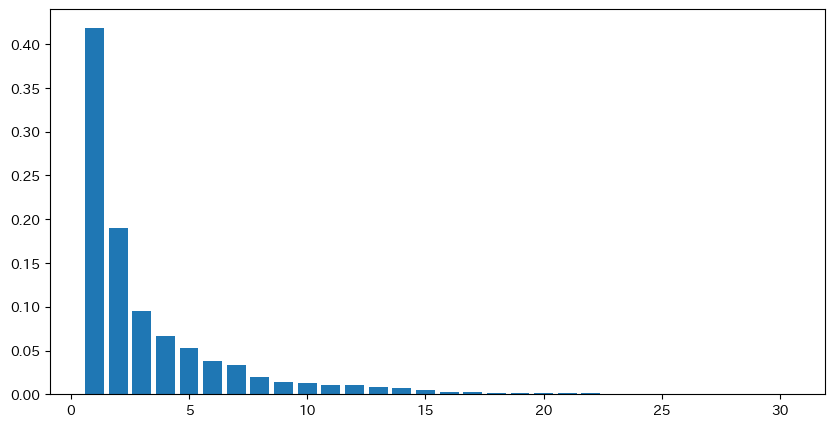

In [113]:
from sklearn.decomposition import PCA

#寄与率
pca = PCA(n_components=30)
pca.fit(X_train_scaled)
plt.figure(figsize=[10, 5])
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)

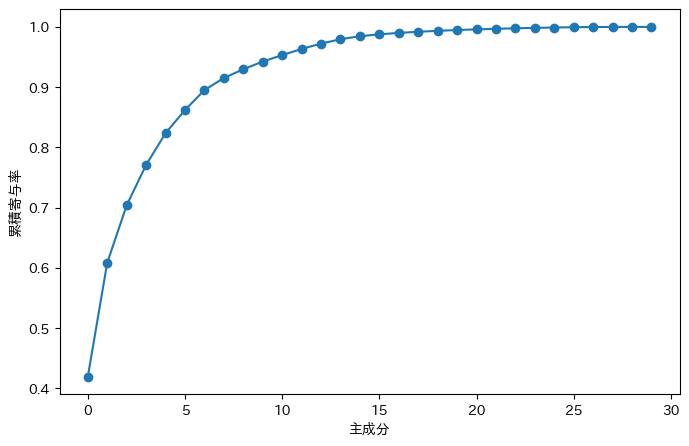

累積寄与率：　['0.82']


,0
0,0.42
1,0.19
2,0.1
3,0.07
4,0.05


In [121]:
#累積寄与率
con_ratio = pca.explained_variance_ratio_
acc_ratio = np.cumsum(con_ratio)
cc_ratio = np.hstack([0, acc_ratio])


plt.figure(figsize=[8, 5])
plt.plot(acc_ratio, '-o')
plt.xlabel("主成分")
plt.ylabel("累積寄与率")
plt.show()

con_ratios = pd.DataFrame(pca.explained_variance_ratio_)
print(f"累積寄与率：　{con_ratios[con_ratios.index<5].sum().round(decimals=2).astype('str').values}")
con_ratios.round(decimals=2).astype('str').head()

説明分散比: [0.4188019  0.18944151]
(341, 3)


,0,1,目的変数
0,-5.120268,-1.917342,0
1,4.752614,-3.929364,1
2,-1.191713,-1.639697,0
3,-1.804613,0.360358,0
4,-3.226923,-1.650486,0


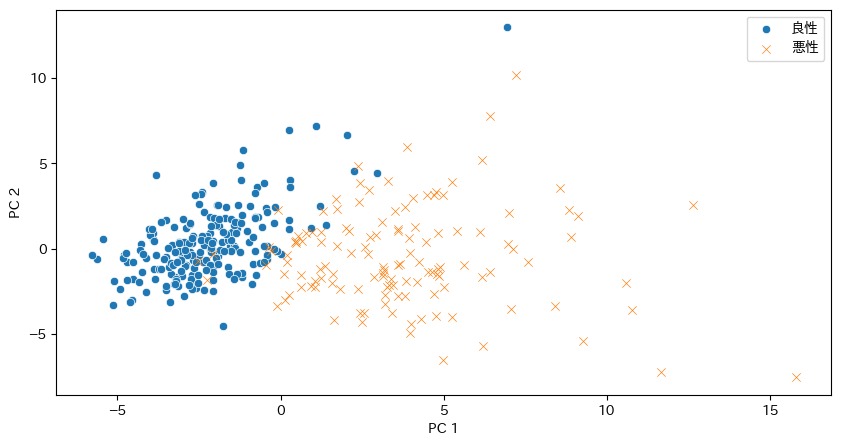

In [165]:
#2次元まで圧縮
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
print(f'説明分散比: {pca.explained_variance_ratio_}')

#散布図
temp2 = pd.DataFrame(X_train_pca)
temp2['目的変数'] = y_train.values
temp2['目的変数'] = temp2['目的変数'].replace({'B':0, 'M':1})
b = temp2[temp2['目的変数'] == 0]
m = temp2[temp2['目的変数'] == 1]

plt.figure(figsize=[10,5])
sns.scatterplot(x=b[0], y=b[1], marker='o', label='良性')
sns.scatterplot(x=m[0], y=m[1], marker='x', label='悪性')
plt.xlabel('PC 1') # 第1主成分：x軸
plt.ylabel('PC 2') # 第2主成分：y軸
plt.legend()

print(temp2.shape)
temp2.head()


"""
説明分散比が60%と高く、よく分離もできている

"""

In [169]:
#累積寄与率が80%までの第1〜第5成分まを抽出

pca = PCA(n_components=5, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
print(f'説明分散比: {pca.explained_variance_ratio_}')

# 散布図
temp5 = pd.DataFrame(X_train_pca)
temp5['目的変数'] = y_train.values
temp5['目的変数'] = temp5['目的変数'].replace({'B':0, 'M':1})
b = temp5[temp5['目的変数'] == 0]
m = temp5[temp5['目的変数'] == 1]

temp5.shape
temp5.head()

説明分散比: [0.4188019  0.18944151 0.09547734 0.06700936 0.05277092]


,0,1,2,3,4,目的変数
0,-5.120268,-1.917342,2.506575,5.443063,0.290279,0
1,4.752614,-3.929364,-0.386455,0.356838,0.194855,1
2,-1.191713,-1.639697,-0.487500,-1.914301,0.372477,0
3,-1.804613,0.360358,-1.102335,-1.381152,-0.310613,0
4,-3.226923,-1.650486,-0.501773,-0.540470,1.231275,0


Train score: 0.950
Test score: 0.932


,予測_負例(0),予測_正例(1)
実際_負例(0),60,1
実際_正例(1),6,36


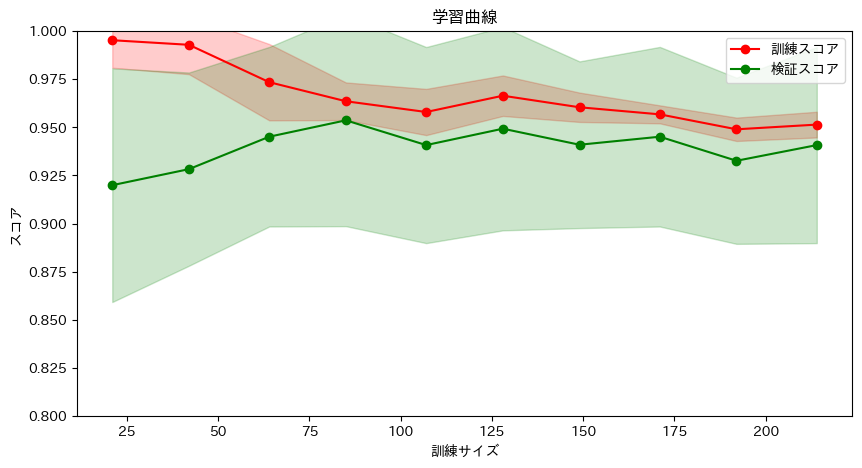

In [176]:
#次元削減後のデータで学習

def learning(data):
    X = data.drop('目的変数', axis=1)
    y = data['目的変数']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    #標準化
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # ロジスティック回帰
    model = LogisticRegressionCV(max_iter=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    
    # 検証、評価
    print('Train score: {:.3f}'.format(model.score(X_train_scaled, y_train)))
    print('Test score: {:.3f}'.format(model.score(X_test_scaled, y_test)))

    # 混同行列
    y_pred = model.predict(X_test_scaled)
    matrix = plot_confusion_matrix(y_pred, y_test)
    matrix

    return model, X_train_scaled, y_train, matrix

#2次元でデータ学習
dimensio_reduce2 = temp2.copy()
model, X_train_scaled, y_train, matrix = learning(dimensio_reduce2)
plot_learning_curve(model, X_train_scaled, y_train)
matrix

Train score: 0.975
Test score: 0.981


'\nノイズが取り除かれたため、訓練データと検証データの重なりが改善されたように見える\nただ、スコアが高すぎるので\n'

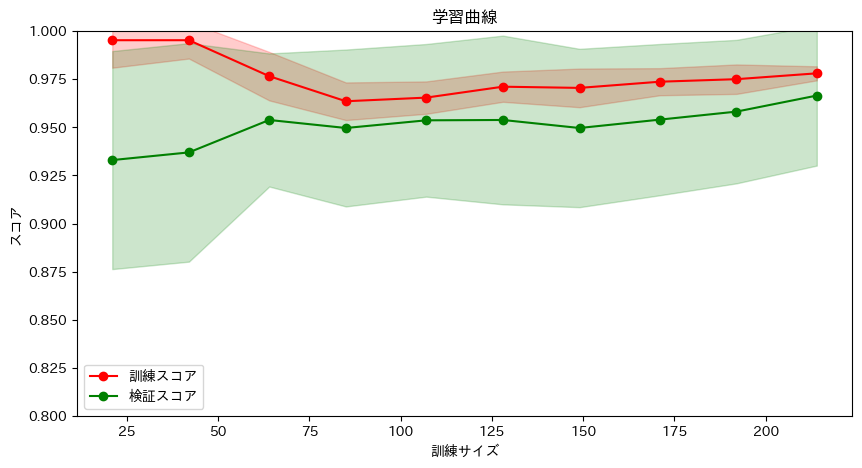

In [178]:
#次元数5のデータで学習

dimensio_reduce5 = temp5.copy()
model, X_train_scaled, y_train, matrix = learning(dimensio_reduce5)
plot_learning_curve(model, X_train_scaled, y_train)
matrix

"""
ノイズが取り除かれたため、訓練データと検証データの重なりが改善されたように見える
ただ、スコアが高すぎるのでROC曲線とAUCを見る
"""

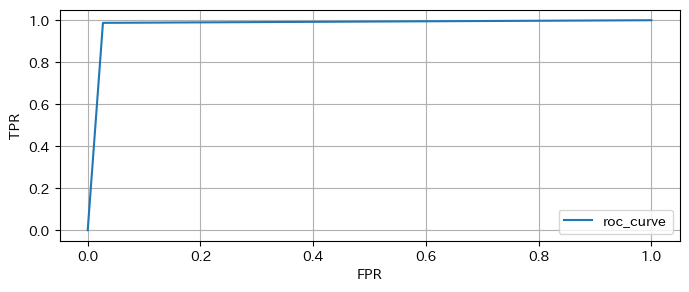

AUC: 0.98


In [186]:
#ROC曲線
from sklearn import metrics

def plot_roc_curve(y_pred, y_test):
    fpr, tpr, thresholds = metrics.roc_curve(y_pred, y_test)
    plt.figure(figsize=[8, 3])
    plt.plot(fpr, tpr, label='roc_curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.grid()
    plt.show()
    
    auc = metrics.auc(fpr, tpr)
    print(f'AUC: {auc.round(decimals=3)}')

y_pred_fig = np.where(y_pred == 'B', 0, 1)
y_test_fig = np.where(y_test == 'B', 0, 1) 

    
plot_roc_curve(y_pred_fig, y_test_fig)


In [192]:
#クロスバリデーションで汎化性を確認
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm

X = dimensio_reduce5.drop('目的変数', axis=1)
y = dimensio_reduce5['目的変数']

sk = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
aucs = []
for train_index, test_index in tqdm(sk.split(X, y)):
    X_train_fld, X_test_fld = X.loc[train_index], X.loc[test_index]
    y_train_fld, y_test_fld = y.loc[train_index], y.loc[test_index]

    
    model = LogisticRegressionCV(cv=5,
                                max_iter=1000,
                                random_state=42,
                                penalty='l2',
                                n_jobs=1)
    
    model.fit(X_train_fld, y_train_fld)
    pred = model.predict(X_test_fld)
    
    matrix = plot_confusion_matrix(pred, y_test_fld)
    matrix
    
    # 検証、評価
    fpr, tpr, thresholds = metrics.roc_curve(y_test_fld, pred)
    auc = metrics.auc(fpr, tpr)
    auc
    aucs.append(auc)

np.mean(aucs).round(decimals=3
                    
                    
"""
ロジスティック回帰のL2正則化について
->L2正則化を指定して、特徴間の相関が高い場合はモデルを安定化、不要な特徴は関係する係数を小さくする（依存性の低下）を期待する

交差検証を行うStratifiedKFold と LogisticRegressionCV を共に使用しているのは、実際には冗長である可能性が高いとchatGPTさん
"""

5it [00:00,  5.59it/s]


0.967